In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

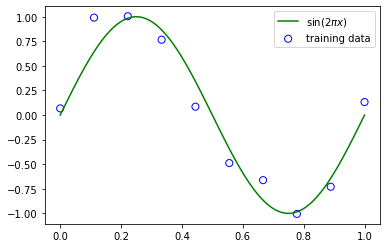

In [41]:
def create_toy_data(func, sample_size, std, rand = False):
    if rand:
        x = np.random.random((1, sample_size))[0]
    else:
        x = np.linspace(0, 1, sample_size).T
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t
def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

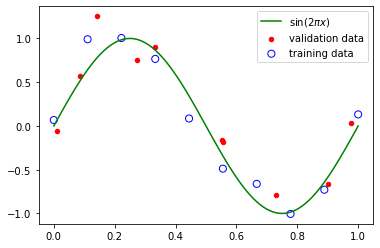

In [43]:
#1 Sample 10 điểm dữ liệu cho tập validation
x_val, y_val = create_toy_data(func, 10, 0.25, True)
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

Model 1
Train loss: 0.27164799633499354
Val loss: 0.24744373217416568


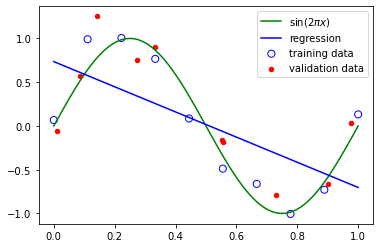

In [47]:
#2 fit 3 model đa thức cho dữ liệu trên, đánh giá mức độ fitting và tính loss train/val
def poly(X, deg):
    if deg == 1:
        return X
    if len(X.shape) == 1:
        return poly(np.column_stack((X, np.power(X, deg))), deg-1)
    return poly(np.column_stack((X, np.power(X[:,0], deg))), deg-1)

class LinearRegression:
    def train(self,X,y):
        self.X = np.c_[X,np.ones(X.shape[0])]
        inv_mat = np.linalg.inv(np.dot(self.X.T,self.X))
        self.coef = np.dot(np.dot(inv_mat,self.X.T),y)
    def fit(self,X = None):
        if X is not None:
            return np.dot(np.c_[X,np.ones(X.shape[0])],self.coef)
        return np.dot(self.X,self.coef)
    def mse(self,fitted,y):
        return np.power(fitted - y,2).sum()/y.shape[0]
x1 = LinearRegression()
x1.train(x_train,y_train)
fitted = x1.fit(x_test)

print("Model 1")
print("Train loss:", x1.mse(x1.fit(),y_train))
print("Val loss:", x1.mse(x1.fit(x_val),y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

Model 3
Train loss: 0.008479192172744097
Val loss: 0.038953688417626434


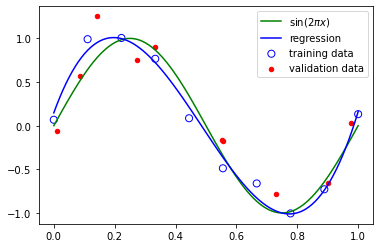

In [48]:
x3 = LinearRegression()
x3.train(poly(x_train,3),y_train)
fitted = x3.fit(poly(x_test,3))

print("Model 3")
print("Train loss:",x3.mse(x3.fit(),y_train))
print("Val loss:",x3.mse(x3.fit(poly(x_val,3)),y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

Model 9
Train loss: 1.4782830526523127e-08
Val loss: 0.0721071735344905


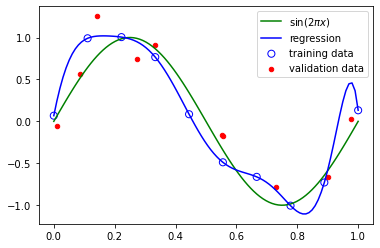

In [53]:
x9 = LinearRegression()
x9.train(poly(x_train, 9), y_train)
fitted = x9.fit(poly(x_test, 9))

print("Model 9")
print('Train loss:', x9.mse(x9.fit(), y_train))
print('Val loss:', x9.mse(x9.fit(poly(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

Model 9
Train loss: 0.05190078042797686
Val loss: 0.05603067566056023


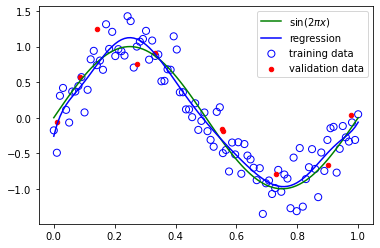

In [57]:
#3.thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfit
x_train2, y_train2 = create_toy_data(func, 100, 0.25)
x9 = LinearRegression()
x9.train(poly(x_train2, 9), y_train2)
fitted = x9.fit(poly(x_test, 9))

print("Model 9")
print('Train loss:', x9.mse(x9.fit(), y_train2))
print('Val loss:', x9.mse(x9.fit(poly(x_val, 9)), y_val))

plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

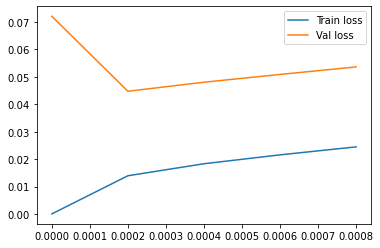

In [60]:
#4.chỉ dùng 10 dữ liệu cho tập train, fil model bậc 9 và dùng rigde regression để giảm overfitting
class RidgeRegression:
    def __init__(self, alpha):
        self.alpha = alpha
    def train(self, X, y):
        self.X = np.c_[X, np.ones(X.shape[0])]
        inv_mat = np.linalg.inv(np.dot(self.X.T, self.X) + self.alpha*np.identity(X.shape[0]))
        self.coef = np.dot(np.dot(inv_mat, self.X.T), y)
    def fit(self, X=None):
        if X is not None:
            return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef)
        return np.dot(self.X, self.coef)
    def mse(self, fitted, y):
        return np.power(fitted-y,2).sum()/y.shape[0]

train_loss = {}
val_loss = {}

for a in np.arange(0, 0.001, 0.0002):
    x = RidgeRegression(a)
    x.train(poly(x_train, 9), y_train)
    fitted = x.fit(poly(x_test, 9))

    train_loss[a] = x.mse(x.fit(), y_train), 
    val_loss[a] = x.mse(x.fit(poly(x_val, 9)), y_val)

plt.plot(list(train_loss.keys()), list(train_loss.values()), label = 'Train loss')
plt.plot(list(val_loss.keys()), list(val_loss.values()), label = 'Val loss')
plt.legend()


Train loss: 0.013919836991903916
Val loss: 0.04474833650325026


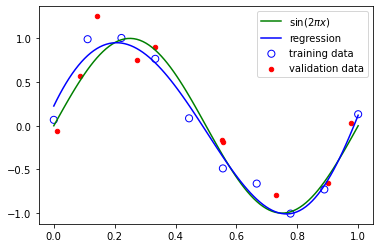

In [61]:
x = RidgeRegression(0.0002)
x.train(poly(x_train, 9), y_train)
fitted = x.fit(poly(x_test, 9))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(poly(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()